Deliverables:

- Write down your codes in the given cells described in this file, denoted as "YOUR CODE HERE"
- Write down your discussion in the given cells, denoted as "YOUR DISCUSSION HERE"
- Submit two files: .ipynb and .html file to eLearning. Both files should include (1) Your code, and (2) the output of the code.
- There is no conceptual problem for this assignment.

The total score of the implementation part is: 100

In [1]:
NAME = "Pooja Patel"

In [3]:
%matplotlib inline 
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

### The MNIST Dataset

The famous MNIST (hand-written digits) dataset contains 60,000 hand-written digit pictures (grayscale), each cut into 28 * 28 grids. It has been broadly applied to examine the performance of classification, clustering, and deep learning algorithms. The original dataset can be loaded using syntax: keras.datasets.mnist.load_data.

In this assignment, we will use a simplified version of this dataset, which contains 1797 hand-written digit pictures (grayscale), each cut in 8 * 8 grids. This simplified dataset reduces computation complexity. The simplified dataset can be loaded using: sklearn.datasets.load_digits.

Run the cell below to (1) load the data and get a brief overview of it; (2) plot some of the pictures to get an intuitive understanding; and (3) split the data.

In [4]:
# Loading Data
from sklearn.datasets import load_digits
mnist = load_digits()
print("Keys of MNIST datset:", mnist.keys())

print("Total number of records:", mnist.data.shape[0])
print("Number of features:", mnist.data.shape[1])
print("Records will be classified into these classes:", mnist.target_names)

Keys of MNIST datset: dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])
Total number of records: 1797
Number of features: 64
Records will be classified into these classes: [0 1 2 3 4 5 6 7 8 9]


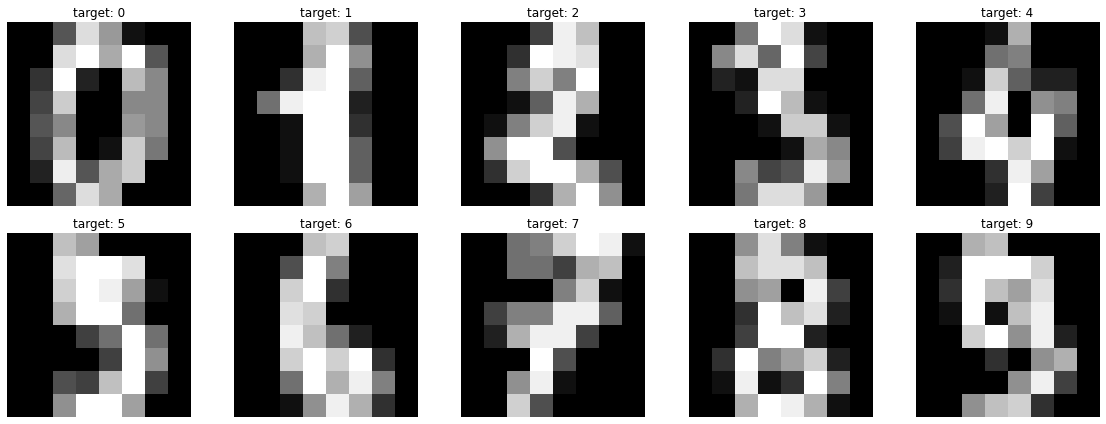

In [5]:
fig, axes = plt.subplots(2, 5, figsize=(16, 6))
for i in range(10):
    axes[i//5, i %5].imshow(mnist.images[i], cmap='gray');
    axes[i//5, i %5].axis('off')
    axes[i//5, i %5].set_title(f"target: {mnist.target[i]}")
    
plt.tight_layout()

In [6]:
# Data Splitting

## Define X and y
X=mnist.data
y=mnist.target

## Split data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=0)

## Section A. Ensemble Methods
In this part, we will first run some simple models, then apply ensemble methods to see the performance. You will need to train TWO simple models and THREE ensemble models. When defining the model function, please use different names (you will need to call these models again in the model evaluation part).


### Question 1. Simple Models - Decision Tree (10 points)
- Train a Decision Tree model. Set "max_depth" to 6, "min_samples_split" to 2, "max_leaf_nodes" to  10, and random_state to 0.
- Report the training and test accuracy of the decision tree model.

In [7]:
## YOUR CODE HERE (for Decision Tree Model)
from sklearn.tree import DecisionTreeClassifier

X_scaled_train, X_scaled_test, y_train, y_test=train_test_split(X_scaled, y, random_state=0)

dec_tree = DecisionTreeClassifier(random_state = 0, max_depth = 6, min_samples_split = 2, max_leaf_nodes = 10)
dec_tree.fit(X_train, y_train)

print("Test: ", dec_tree.score(X_test, y_test))
print("Train: ", dec_tree.score(X_train, y_train))

Test:  0.66
Train:  0.6622123236822569


### Question 2. Simple Models - Naive Bayes (10 points)
- Choose the proper Naive Bayes model and train accordingly.  
- Report the training and test accuracy of the naive bayes model.

In [8]:
# YOUR CODE HERE (for Naive Bayes Model)
from sklearn.naive_bayes import GaussianNB

g_nb = GaussianNB()
g_nb.fit(X_train, y_train)

print("Test: ", g_nb.score(X_test, y_test))
print("Train: ", g_nb.score(X_train, y_train))

Test:  0.8355555555555556
Train:  0.8478099480326652


### Question 3. Ensemble Methods - Random Forest (15 points)
- Train a random forest model. Specifically, train 200 decision trees on 1000 resampled records. For each tree, keep specifications the same as those used in Question 1 (i.e., max_depth = 6, min_samples_split = 2, etc.)
- What is the training and  test accuracy for the random forest?
- Compare the performance (test accuracy) of random forest and decision tree. What do you find? Briefly discuss the difference between decision tree and random forest, and how the difference would influence model performance.

In [9]:
# YOUR CODE HERE
from sklearn.ensemble import RandomForestClassifier

rnd_clf = RandomForestClassifier(n_estimators=200, max_samples=1000, max_depth = 6, min_samples_split = 2, random_state=42)
rnd_clf.fit(X_train, y_train)

print("Test: ", rnd_clf.score(X_test, y_test))
print("Train: ", rnd_clf.score(X_train, y_train))

Test:  0.9511111111111111
Train:  0.9866369710467706


In [1]:
# YOUR DISCUSSION HERE
# Random forest would combine multiple trees in order to reduce the number of errors. Decision trees have a lot of noise, thus impacting the nodes/leaves.

### Question 4. Ensemble Methods - AdaBoost (15 points)
- Apply Gaussian Naive Bayes (with default settings, same as Q2) with AdaBoost. Run the Naive Bayes model 200 times. Let learning_rate = 0.3, and random_state = 0.
- Report the test accuracy of the Naive Bayes model with AdaBoost.
- Compare the performance (test accuracy) of naive bayes with and without adaboost. Briefly discuss the role of adaboost.

In [10]:
# YOUR CODE HERE
from sklearn.ensemble import AdaBoostClassifier

naive_dt = DecisionTreeClassifier(max_depth=1)
ada_clf = AdaBoostClassifier(
    naive_dt, n_estimators=200, learning_rate=0.3,
    random_state=0)
ada_clf.fit(X_train, y_train)

print("Test: ", ada_clf.score(X_test, y_test))
print("Train: ", ada_clf.score(X_train, y_train))

Test:  0.7355555555555555
Train:  0.7401633259094283


In [2]:
# YOUR DISCUSSION HERE
# Performance of Naive bayes was better without AdaBoost. AdaBoost helps build a model that gives equal weights to all data points.

## Section B. Clustering
The MNIST dataset can also be used for clustering practice. This case, we are not classifying a digit to its corresponding label. Instead, we assume that no digit label is known, and we are simply clustering these pictures based on their similarity.


### Question 5. Clustering Prep (10 points)
We have learned two clustering methods, K-Means and DBSCAN. Both methods require scaling before applying the model. 
- Apply MinMax Scaling to our data so that the scaled data can be used for clustering algorithms. For result consistency, use sklearn package for minmax scaling. 


In [19]:
# YOUR CODE HERE
from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler(feature_range=(0,1))
minmax.fit(X)
X_scaled = minmax.transform(X)

### Question 6. K-Means Clustering (10 points)
- Apply K-Means, set k=10 (as we have already known there should be 10 digits), and random state = 0. Make sure you are using the scaled data.
- Predict the cluster labels. Name the result (i.e., cluster labels) as "labels". 

In [27]:
# YOUR CODE HERE
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=10, random_state = 0)
kmeans.fit(X_scaled)

labels = kmeans.predict(X_scaled)
print("Labels:", labels)


Labels: [2 1 1 ... 1 7 7]


### Question 7 DBSCAN (20 points)
- Apply DBSCAN, set eps to 1 and min_samples to 5. Predict the cluster labels. Name the result as "temp_clusters". How many unique clusters do we have? 
- Apply DBSCAN again, let eps = 1.5 and min_samples = 5. Predict the cluster labels. Name the result as "clusters". How many unique clusters do we have now? 
- Compare the choice of eps and the number of clusters, briefly discuss the impact of eps on cluster number.
- Given that there are 10 digits, which parameter choice would you choose? eps = 1 or eps = 1.5?

In [21]:
# YOUR CODE HERE (DBSCAN with eps = 1)

from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=1, min_samples=5)
clusters = dbscan.fit_predict(X_scaled)
print("Temp Clusters:",clusters)
print("Unique Clusters:", np.unique(clusters))

Temp Clusters: [ 0 -1 -1 ... -1 -1 -1]
Unique Clusters: [-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22
 23 24 25]


In [22]:
# YOUR CODE HERE (DBSCAN with eps = 1.5)
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=1.5, min_samples=5)
clusters = dbscan.fit_predict(X_scaled)
print("Temp Clusters:",clusters)
print("Unique Clusters:", np.unique(clusters))

Temp Clusters: [ 0  1 -1 ...  1  1 -1]
Unique Clusters: [-1  0  1  2  3  4  5  6  7  8]


In [23]:
# YOUR DISCUSSION HERE (Include the discussion for the last two problems here.)

# Eps is the epsilon circle width. The minimum samples are the number of centers made inside of the circle. It specifies how close the points should be to each other to be a part of the cluster.
# If there are 10 digits, the the parameter choice that will be chosen is eps = 1.5.


### Question 8. Performance of Clustering (Open Question, 10 Points)
Clustering is an unsupervised learning method and does not have a "ground truth" (i.e., the cluster label of each example). Thus, it is difficult to show the performance of clustering results. 

When working with pictures, one way to provide some evidence of clustering performance is to show some pictures within each cluster, and see if the clustering result makes sense. 

- The cell below plots 5 pictures for each cluster (kmeans clustering). Run the cell below to generate the plot. (Double check Q6 - the clustering result should be under the name "labels".)
- Discuss briefly about the clustering result. Does the method work well in this case? (Open Question)

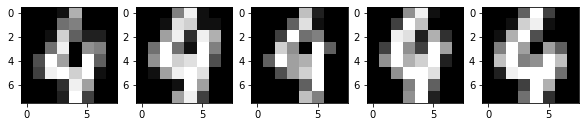

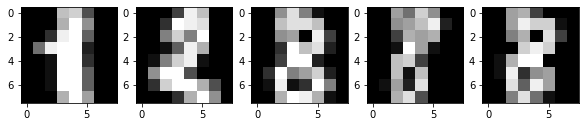

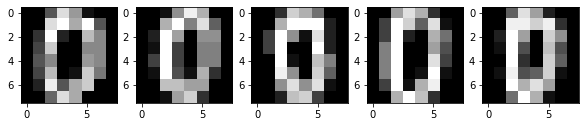

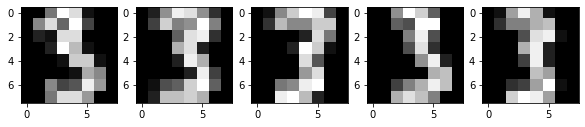

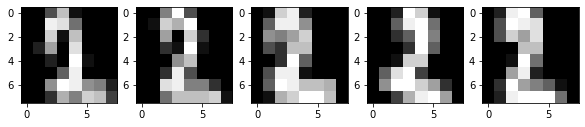

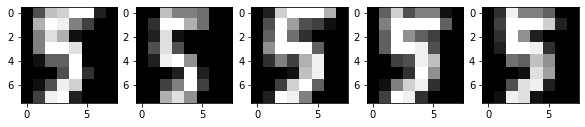

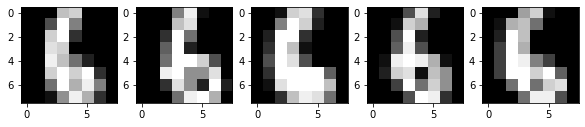

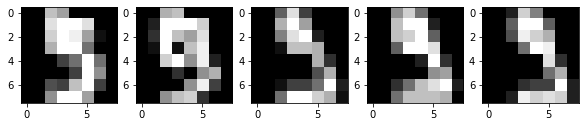

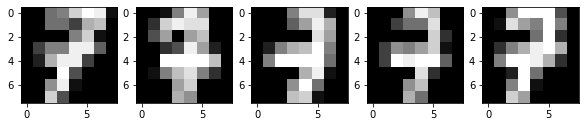

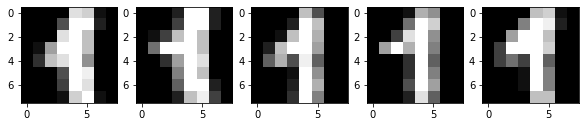

In [28]:
# RUN THIS CELL TO GET FIGURE
def draw_digit(data, row, col, n):
    plt.subplot(row, col, n)    
    plt.imshow(data)
    plt.gray()

for nb in range(10):
    show_size = 5
    plt.figure(figsize=(10,10))
    count = 0

    for i in range(mnist.images.shape[0]):
        if count < show_size and labels[i] == nb:
            draw_digit(mnist.images[i].reshape(8,8), 1, show_size, count+1)
            count += 1
    plt.show()

In [29]:
# YOUR DISCUSSION HERE
# KMeans clusters seems to be working well for this scenario as it helps visualize the digits slightly better.